**1. Personal Information**

Name: Ravin Oedayrajsingh Varma  
StudentID: 12383139  
Email: ravin.oedayrajsingh.varma@student.uva.nl    
Submitted on: 23-3-2025  
Github: https://github.com/Rav78/Thesis_MSc_UvA.git  

**2. Data context**

The data that will be used during the thesis will be data about House Price Prediction from Zillow, an American tech real estate market place company. The data contains a variety of property-related features. Examples of such features are listing prices, property characteristics (e.g. area value, number of bedrooms, number of bathrooms) and marked-related information, such as estimated property values (Zestimate) and mortgage rates. 

This dataset includes over 7000 real estate properties across the United States and different types of datatypes, such as textual data in descriptions, numerical data, and image data. This data is stems from the real estate domain and can be used to for modeling techniques, such as price prediction and even Natural Language Processing. The data allows insights into interesting findings such as price patterns and even market variations    

**3. Data Description**

Below the code for the analysis of the codeblocks and their corresponding outputs. There are a few interactive maps, but they are not visible in pdf view. Instead, a snapshot of the maps was created to provide a visual.


In [1]:
import pandas as pd
import plotly.express as px
import seaborn as sns
from scipy.stats import norm
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from collections import Counter
import plotly.graph_objects as go
from IPython.display import display, Image
import numpy as np
import re
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xg 
from sklearn.model_selection import train_test_split 
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch.optim as optim

Loading the dataset

In [2]:
df = pd.read_excel("Zillow.com House Price Prediction Data.xlsx")

In [3]:
df.shape

(7160, 67)

This shows that the data contains 7160 rows and 67 columns

***Display of the column names***

In [4]:
df.columns

Index(['contact_recipients', 'longitude', 'countyFIPS', 'imgSrc',
       'livingAreaValue', 'streetAddress', 'county', 'monthlyHoaFee',
       'timeZone', 'taxHistory', 'dateSold', 'annualHomeownersInsurance',
       'state', 'listed_by', 'yearBuilt', 'brokerageName', 'description',
       'latitude', 'nearbyHomes', 'priceHistory', 'schools', 'rentZestimate',
       'city', 'providerListingID', 'currency', 'listingProvider',
       'zestimateLowPercent', 'openHouseSchedule', 'mortgageRates', 'address',
       'cityId', 'timeOnZillow', 'url', 'zestimate', 'zpid', 'countyId',
       'brokerId', 'livingAreaUnits', 'comingSoonOnMarketDate', 'livingArea',
       'building', 'stateId', 'zipcode', 'propertyTaxRate', 'attributionInfo',
       'bathrooms', 'homeStatus', 'homeFacts', 'resoFacts', 'datePosted',
       'bedrooms', 'propertyTypeDimension', 'mortgageZHLRates', 'price',
       'favoriteCount', 'isListedByOwner', 'zestimateHighPercent', 'mlsid',
       'listingSubType', 'pageViewCount

In [5]:
df

,contact_recipients,longitude,countyFIPS,imgSrc,livingAreaValue,streetAddress,county,monthlyHoaFee,timeZone,taxHistory,...,mlsid,listingSubType,pageViewCount,buildingId,country,homeType,solarPotential,contingentListingType,message,resoFacts.daysOnZillow
0,"[{'agent_reason': 1, 'zpro': None, 'recent_sal...",-105.586044,56001.0,https://photos.zillowstatic.com/fp/46875e6d54c...,300.0,816 E Grand Ave APT 3,Albany County,NaN,America/Denver,{},...,NaN,"{'is_FSBA': False, 'is_comingSoon': False, 'is...",0.0,1.050546e+09,USA,APARTMENT,NaN,NaN,NaN,NaN
1,"[{'agent_reason': 1, 'zpro': None, 'recent_sal...",-77.968025,NaN,https://maps.googleapis.com/maps/api/streetvie...,1200.0,226-242 N. Raleigh St.,Berkeley County,NaN,America/New_York,{},...,NaN,"{'is_FSBA': False, 'is_comingSoon': False, 'is...",0.0,NaN,USA,MULTI_FAMILY,NaN,NaN,NaN,NaN
2,{},-79.946980,NaN,https://photos.zillowstatic.com/fp/6a600b9eb81...,NaN,1107-1111 Burns St #1109,Monongalia County,NaN,America/New_York,{},...,NaN,"{'is_FSBA': False, 'is_comingSoon': False, 'is...",61.0,2.340595e+09,USA,APARTMENT,NaN,NaN,NaN,NaN
3,"[{'agent_reason': 1, 'zpro': None, 'recent_sal...",-80.040450,NaN,https://photos.zillowstatic.com/fp/176fde20626...,NaN,900 Old Huttonsville Rd,Pocahontas County,NaN,America/New_York,{},...,NaN,"{'is_FSBA': False, 'is_comingSoon': False, 'is...",0.0,NaN,USA,SINGLE_FAMILY,NaN,NaN,NaN,NaN
4,"[{'agent_reason': 1, 'zpro': None, 'recent_sal...",-82.263310,54011.0,https://photos.zillowstatic.com/fp/6f95297e351...,680.0,3555 Us Route 60 E APT 102,Cabell County,NaN,America/New_York,{},...,NaN,"{'is_FSBA': False, 'is_comingSoon': False, 'is...",1.0,1.136320e+09,USA,APARTMENT,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7155,{},NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"{'is_FSBA': False, 'is_comingSoon': False, 'is...",NaN,NaN,USA,NaN,NaN,NaN,NaN,NaN
7156,{},NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"{'is_FSBA': False, 'is_comingSoon': False, 'is...",NaN,NaN,USA,NaN,NaN,NaN,NaN,NaN
7157,{},NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"{'is_FSBA': False, 'is_comingSoon': False, 'is...",NaN,NaN,USA,NaN,NaN,NaN,NaN,NaN
7158,{},NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"{'is_FSBA': False, 'is_comingSoon': False, 'is...",NaN,NaN,USA,NaN,NaN,NaN,NaN,NaN


***Datatypes of all columns***

In [6]:
df.dtypes

contact_recipients         object
longitude                 float64
countyFIPS                float64
imgSrc                     object
livingAreaValue           float64
                           ...   
homeType                   object
solarPotential            float64
contingentListingType     float64
message                   float64
resoFacts.daysOnZillow    float64
Length: 67, dtype: object

In [7]:
df.describe()

,longitude,countyFIPS,livingAreaValue,monthlyHoaFee,annualHomeownersInsurance,yearBuilt,latitude,rentZestimate,zestimateLowPercent,cityId,...,price,favoriteCount,isListedByOwner,zestimateHighPercent,pageViewCount,buildingId,solarPotential,contingentListingType,message,resoFacts.daysOnZillow
count,6042.000000,5896.000000,5869.000000,1161.000000,7160.000000,5690.000000,6042.000000,6034.000000,5662.000000,6035.000000,...,7.160000e+03,6043.000000,49.0,5662.000000,6043.000000,1.214000e+03,0.0,0.0,0.0,0.0
mean,-145.749918,3232.119742,1795.795025,287.714040,1211.979888,1976.310545,59.585590,2593.182963,9.747969,25628.359735,...,2.885633e+05,0.815489,0.0,9.862769,17.600199,1.475657e+09,NaN,NaN,NaN,NaN
std,15.835762,6468.792955,1532.936783,1352.210988,994.675514,13.387253,6.073109,763.919618,2.787896,35318.708325,...,2.368257e+05,10.256293,0.0,3.263507,226.789666,5.637526e+08,NaN,NaN,NaN,NaN
min,-158.757920,1031.000000,0.000000,4.000000,0.000000,1880.000000,18.073723,693.000000,5.000000,3436.000000,...,0.000000e+00,0.000000,0.0,5.000000,0.000000,3.322900e+04,NaN,NaN,NaN,NaN
25%,-149.925387,2020.000000,1141.000000,103.000000,0.000000,1970.000000,61.143157,2080.000000,8.000000,23482.000000,...,0.000000e+00,0.000000,0.0,8.000000,0.000000,1.003408e+09,NaN,NaN,NaN,NaN
50%,-149.859490,2020.000000,1670.000000,271.000000,1326.000000,1977.000000,61.163494,2570.000000,9.000000,23482.000000,...,3.156000e+05,0.000000,0.0,9.000000,1.000000,1.047348e+09,NaN,NaN,NaN,NaN
75%,-149.805183,2020.000000,2128.000000,350.000000,1803.000000,1983.000000,61.196480,2990.750000,11.000000,23482.000000,...,4.294000e+05,0.000000,0.0,11.000000,2.000000,2.088126e+09,NaN,NaN,NaN,NaN
max,-66.049990,56001.000000,95337.000000,45929.000000,11550.000000,2023.000000,61.231228,11544.000000,38.000000,839846.000000,...,2.750000e+06,369.000000,0.0,59.000000,12925.000000,2.734416e+09,NaN,NaN,NaN,NaN


The description of the columns shows how each column is distributed. We see that some columns to not have 7160 values, which means that these columns are populated with NaN values. 

***Count of NaN values in the whole dataset***

In [8]:
nan_count = df.isna().sum()
print ("number of NaN values per column: ")
nan_count

number of NaN values per column: 


contact_recipients           0
longitude                 1118
countyFIPS                1264
imgSrc                    1117
livingAreaValue           1291
                          ... 
homeType                   891
solarPotential            7160
contingentListingType     7160
message                   7160
resoFacts.daysOnZillow    7160
Length: 67, dtype: int64

The dataset has 7160 rows and there are columns in the dataset that only include NaN values. Some of columns include only NaN values, which means that they are not useful. 

**Map of the USA and the corresponding Real estate properties**

In [9]:
map_df = df[['longitude', 'latitude']]
map_df = map_df.dropna()

In [10]:
fig = px.scatter_geo(map_df, lat='latitude', lon='longitude',
                     #size='mag',
                     title='Distributions of real estate properties in the USA')
fig.show()

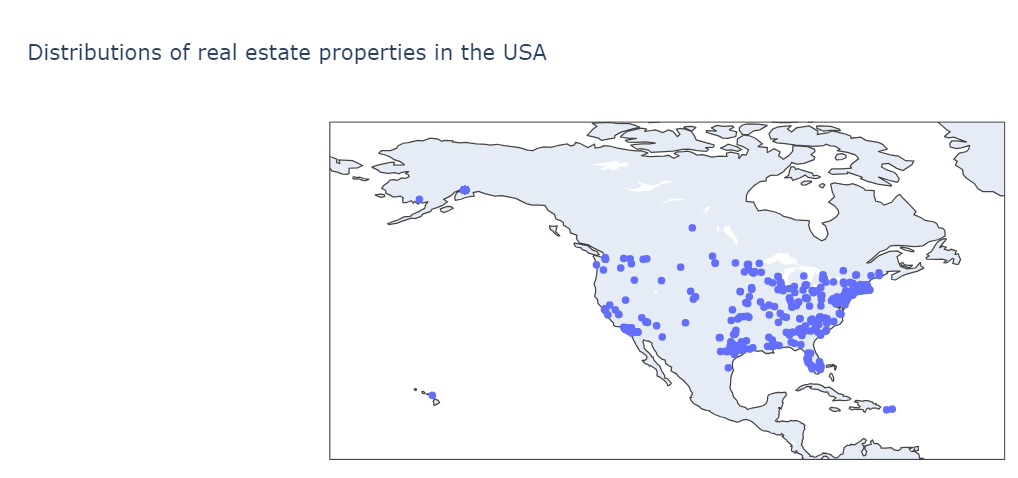

In [11]:
display(Image("Distribution of real estate properties in the US.png"))

The geomap shows the distribution of the real estate properties in the United States. We see that the datapoints are mostly in U.S. territory (Including Puerto Rico) and some datapoints in Canada. 

***Distribution of price, living area, and the Z-estimate of the rent value***

In [12]:
def barchart_plot(feature, label, title):
    sns.histplot(df[feature], kde=True, color='black', edgecolor='red')
    
    plt.xlabel(label)
    plt.ylabel('Density')
    plt.title(title)
    
    plt.show()

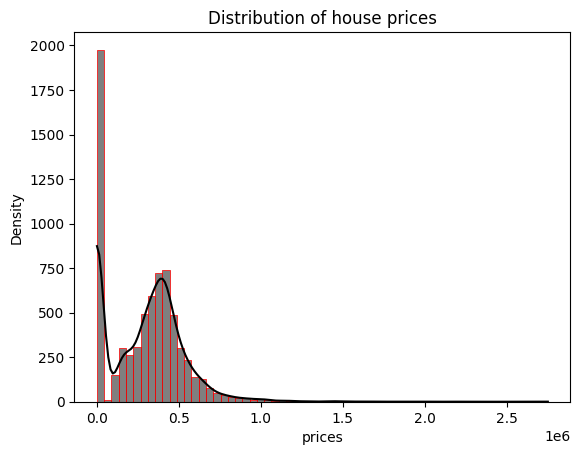

In [13]:
barchart_plot('price', 'prices', 'Distribution of house prices')

0 seems to be an outlier in the graph, which means that the price of the real estate property is probably not known. Nevertheless, we see that there is somewhat of a normal distribtion within the price range. The values vary up and until approximately $3 million.  

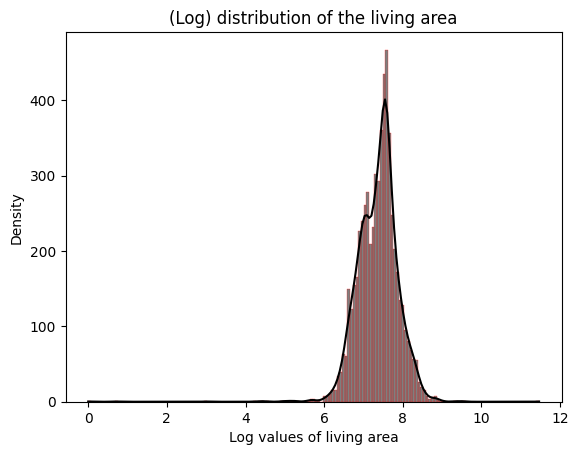

In [14]:
living_area_df = df['livingArea'].dropna()
living_area_df = living_area_df[living_area_df != 0]

log_values = np.log(living_area_df)

sns.histplot((log_values), kde=True, color='black', edgecolor='red')

plt.xlabel('Log values of living area')
plt.ylabel('Density')
plt.title('(Log) distribution of the living area')

plt.show()


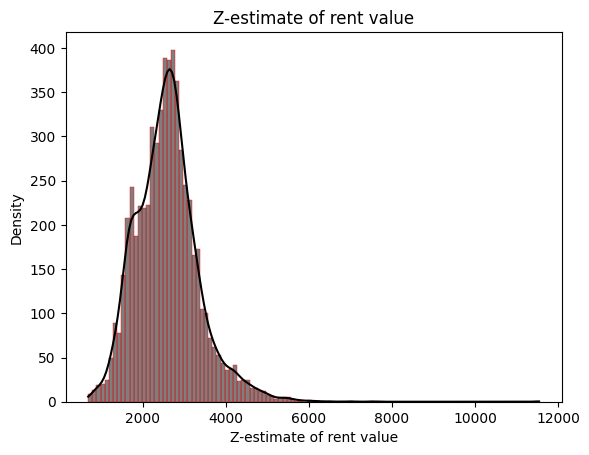

In [15]:
barchart_plot('rentZestimate', 'Z-estimate of rent value', 'Z-estimate of rent value')

***Types of homes and the times they appear in the dataset***

In [16]:
df['homeType'].value_counts()

homeType
SINGLE_FAMILY        4074
CONDO                 901
MULTI_FAMILY          511
APARTMENT             253
HOME_TYPE_UNKNOWN     236
TOWNHOUSE             185
LOT                    93
MANUFACTURED           16
Name: count, dtype: int64

Most of the home types are single family houses, which makes up for more than 60% of all real estate properties in the dataset. This shows there is quite a bias towards single family houses.

***Countries that appear in the dataset and the number of states and counties across the whole dataset***

In [17]:
df['country'].value_counts()

country
USA    7154
CAN       6
Name: count, dtype: int64

In [18]:
df['state'].value_counts()

state
AK    5636
CA      43
TX      42
MA      38
NY      27
FL      22
PA      21
NC      14
IL      13
OH      13
GA      13
MN      11
NJ      10
SC       9
WI       9
AL       8
WA       7
MO       7
MI       6
AZ       5
OK       5
CT       5
IN       5
IA       5
MD       5
MS       5
ON       5
WV       4
ND       4
KY       4
TN       4
VA       4
ME       3
RI       3
MT       3
CO       2
VT       2
PR       2
OR       2
KS       2
NV       2
LA       2
AR       2
DC       2
ID       2
WY       1
SK       1
NM       1
DE       1
HI       1
Name: count, dtype: int64

Most real estate properties are located in the state Alaska. This seems a bit in contrast to what was earlier displayed in the geomap, but the explanation for this is that most of the real estate properties in Alaska are near each other.

In [19]:
num_of_dist_counties = len(df['county'].value_counts())
print ("Number of distinct counties across the whole dataset: ", num_of_dist_counties)

Number of distinct counties across the whole dataset:  223


***Removing columns that only have NaN values***

In [20]:
df = df.dropna(axis=1, how='all')

As mentioned earlier, columns that only contain NaN-values are not useful and should therefore be dropped from the dataset. The same goes for rows, in which more than half of the entries contain NaN values. In the codeblocks below, these rows get dropped from the dataset. 

***Removing rows in which more than the half of the entries only have NaN values***

In [21]:
df = df.dropna(thresh=len(df.columns) // 2)

In [22]:
df

,contact_recipients,longitude,countyFIPS,imgSrc,livingAreaValue,streetAddress,county,monthlyHoaFee,timeZone,taxHistory,...,price,favoriteCount,isListedByOwner,zestimateHighPercent,mlsid,listingSubType,pageViewCount,buildingId,country,homeType
0,"[{'agent_reason': 1, 'zpro': None, 'recent_sal...",-105.586044,56001.0,https://photos.zillowstatic.com/fp/46875e6d54c...,300.0,816 E Grand Ave APT 3,Albany County,NaN,America/Denver,{},...,0,0.0,NaN,NaN,NaN,"{'is_FSBA': False, 'is_comingSoon': False, 'is...",0.0,1.050546e+09,USA,APARTMENT
1,"[{'agent_reason': 1, 'zpro': None, 'recent_sal...",-77.968025,NaN,https://maps.googleapis.com/maps/api/streetvie...,1200.0,226-242 N. Raleigh St.,Berkeley County,NaN,America/New_York,{},...,575900,0.0,NaN,14.0,NaN,"{'is_FSBA': False, 'is_comingSoon': False, 'is...",0.0,NaN,USA,MULTI_FAMILY
2,{},-79.946980,NaN,https://photos.zillowstatic.com/fp/6a600b9eb81...,NaN,1107-1111 Burns St #1109,Monongalia County,NaN,America/New_York,{},...,950,3.0,NaN,NaN,NaN,"{'is_FSBA': False, 'is_comingSoon': False, 'is...",61.0,2.340595e+09,USA,APARTMENT
3,"[{'agent_reason': 1, 'zpro': None, 'recent_sal...",-80.040450,NaN,https://photos.zillowstatic.com/fp/176fde20626...,NaN,900 Old Huttonsville Rd,Pocahontas County,NaN,America/New_York,{},...,372600,0.0,NaN,11.0,NaN,"{'is_FSBA': False, 'is_comingSoon': False, 'is...",0.0,NaN,USA,SINGLE_FAMILY
4,"[{'agent_reason': 1, 'zpro': None, 'recent_sal...",-82.263310,54011.0,https://photos.zillowstatic.com/fp/6f95297e351...,680.0,3555 Us Route 60 E APT 102,Cabell County,NaN,America/New_York,{},...,0,0.0,NaN,NaN,NaN,"{'is_FSBA': False, 'is_comingSoon': False, 'is...",1.0,1.136320e+09,USA,APARTMENT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6038,"[{'agent_reason': 1, 'zpro': None, 'recent_sal...",-149.784060,2020.0,https://photos.zillowstatic.com/fp/9a5eeb7e3bd...,4263.0,11700 Shetland Heights Cir,Anchorage Borough,28.0,America/Anchorage,"[{'time': 1692051214290, 'valueIncreaseRate': ...",...,658100,0.0,NaN,10.0,NaN,"{'is_FSBA': False, 'is_comingSoon': False, 'is...",0.0,NaN,USA,SINGLE_FAMILY
6039,"[{'agent_reason': 1, 'zpro': None, 'recent_sal...",-149.782960,2020.0,https://maps.googleapis.com/maps/api/streetvie...,2200.0,5300 Whispering Spruce Dr,Anchorage Borough,28.0,America/Anchorage,"[{'time': 1692051220320, 'valueIncreaseRate': ...",...,514200,0.0,NaN,9.0,NaN,"{'is_FSBA': False, 'is_comingSoon': False, 'is...",0.0,NaN,USA,SINGLE_FAMILY
6040,"[{'agent_reason': 1, 'zpro': None, 'recent_sal...",-149.752200,2020.0,https://maps.googleapis.com/maps/api/streetvie...,4180.0,10630 E Tree Dr,Anchorage Borough,45.0,America/Anchorage,"[{'time': 1692051226239, 'valueIncreaseRate': ...",...,659000,0.0,NaN,12.0,NaN,"{'is_FSBA': False, 'is_comingSoon': False, 'is...",4.0,NaN,USA,SINGLE_FAMILY
6041,"[{'agent_reason': 1, 'zpro': None, 'recent_sal...",-149.756580,2020.0,https://maps.googleapis.com/maps/api/streetvie...,3928.0,6747 Double Tree Ct,Anchorage Borough,45.0,America/Anchorage,"[{'time': 1692051251284, 'valueIncreaseRate': ...",...,709400,0.0,NaN,9.0,NaN,"{'is_FSBA': False, 'is_comingSoon': False, 'is...",1.0,NaN,USA,SINGLE_FAMILY


In the price column, values that are equal to 0 will be imputed using the median of the prices. The median is used instead of the mean because it is less sensitive to extreme values or outliers, which helps maintain a more representative distribution of property prices. Since real estate prices can have significant variations due to luxury properties or distressed sales, using the median ensures that imputed values do not get skewed by exceptionally high or low prices.

In [23]:
df['price'] = df['price'].replace(0, df['price'].median())

In [24]:
df_price_lon_lat = df[['longitude', 'latitude', 'price']]

print ("Price Density Map of the USA")
fig = go.Figure(go.Densitymap(lat=df_price_lon_lat.latitude, lon=df_price_lon_lat.longitude, z=df_price_lon_lat.price,
                                 radius=10))
fig.update_layout(
    map_style="open-street-map", 
    map_center_lon=180, 
    title="Price Density Map", 
    margin={"r":0,"t":0,"l":0,"b":0}
)
fig.show()


Price Density Map of the USA


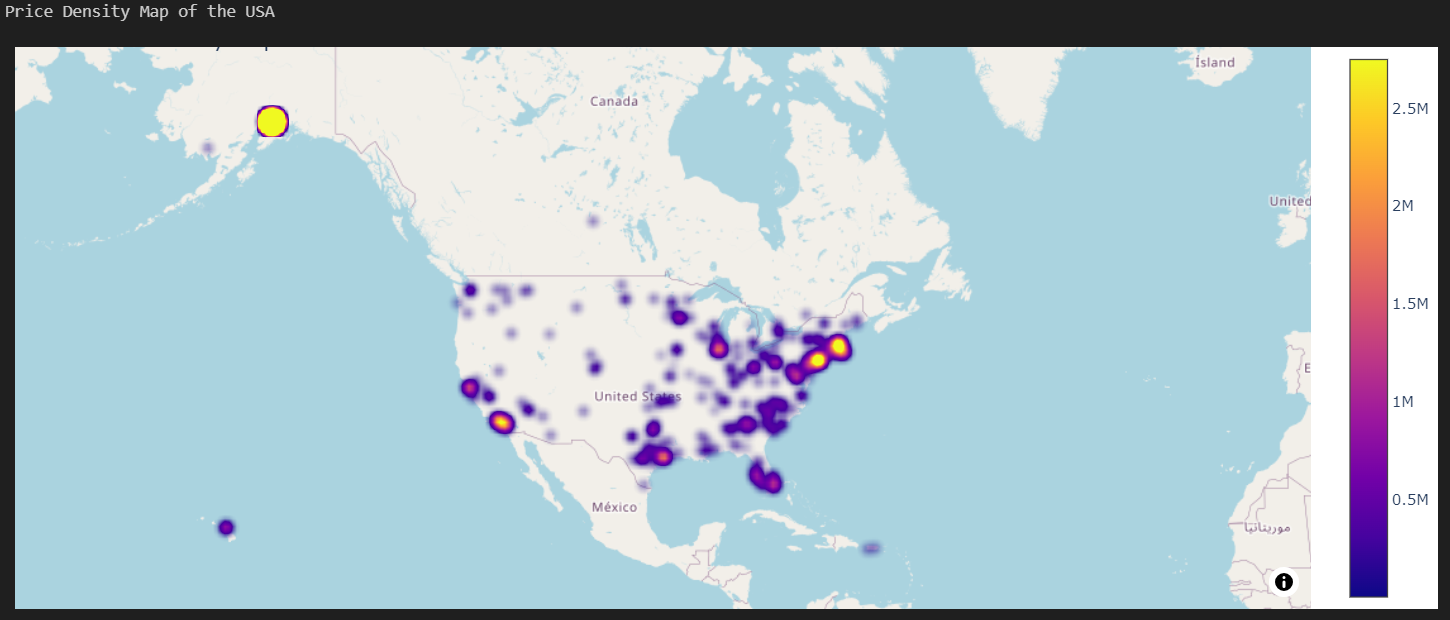

In [25]:
display(Image("Price Density Map USA.png"))

In the image (and the interactive map) we see that the highest prices are mostly in the upper east coast (New York State), in Alaska, and in the South of California. The price density across the United States in this map are proportionally divided to an extend. 

***Types of homes in the dataset***

In [26]:
unique_hometypes = df['homeType'].unique()

unique_hometypes

array(['APARTMENT', 'MULTI_FAMILY', 'SINGLE_FAMILY', 'HOME_TYPE_UNKNOWN',
       'MANUFACTURED', 'LOT', 'TOWNHOUSE', 'CONDO'], dtype=object)

In [27]:
df['homeType'].value_counts()

homeType
SINGLE_FAMILY        4074
CONDO                 901
MULTI_FAMILY          511
APARTMENT             253
TOWNHOUSE             185
LOT                    93
MANUFACTURED           16
HOME_TYPE_UNKNOWN      10
Name: count, dtype: int64

Description column of the dataset and the analysis of all the descriptions combined

In [28]:
df['description']

0       This 300 square foot apartment home has 0 bedr...
1       This 1200 square foot multi family home has 9 ...
2       This is a 3 bedroom, 1.5 bath apartment in a 3...
3       Great location! Secluded as it sits at the end...
4       Available for Move In September 18th!\n\nSpaci...
                              ...                        
6038    An entertainer's dream! The open floor plan wr...
6039    This 2200 square foot single family home has 4...
6040    This 4180 square foot single family home has 5...
6041    Tastefully remodeled, not a trace of an older ...
6042    This 2576 square foot single family home has 4...
Name: description, Length: 6043, dtype: object

In [29]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\roedayrajsinghvarma\AppData\Roaming\nltk_data
[nltk_data]     ...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\roedayrajsinghvarma\AppData\Roaming\nltk_data
[nltk_data]     ...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\roedayrajsinghvarma\AppData\Roaming\nltk_data
[nltk_data]     ...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\roedayrajsinghvarma\AppData\Roaming\nltk_data
[nltk_data]     ...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [30]:
text_corpus = " ".join(df['description'].dropna())  

words = nltk.word_tokenize(text_corpus.lower())  

stop_words = set(stopwords.words('english'))
articles = {"a", "an", "the"}  

filtered_words = [word for word in words if word.isalpha() and word not in stop_words and word not in articles]

pos_tags = nltk.pos_tag(filtered_words)

nouns = [word for word, tag in pos_tags if tag in ["NN", "NNS", "NNP", "NNPS"]]

common_nouns = Counter(nouns).most_common(20)  

print("Most common words in the description of the dataset:", common_nouns)

Most common words in the description of the dataset: [('home', 8589), ('bedrooms', 3589), ('anchorage', 3248), ('family', 3109), ('foot', 2840), ('ak', 2211), ('room', 1530), ('kitchen', 938), ('garage', 929), ('unit', 872), ('deck', 813), ('condo', 795), ('area', 789), ('bedroom', 780), ('bath', 748), ('floor', 679), ('master', 617), ('storage', 611), ('dr', 566), ('location', 562)]


Since the descriptions are a pivotal part of this thesis, the description of each real estate property in the dataset has been analyzed. In order to analyze the most common words, everything in the corpus was converted to lowercase. Afterwards, articles (a, an, the) and stop words were removed from the corpus and eventually, the 20 most common nouns are displayed. 

[('home', 8589), ('bedrooms', 3589), ('anchorage', 3248), ('family', 3109), ('foot', 2840), ('ak', 2211), ('room', 1530), ('kitchen', 938), ('garage', 929), ('unit', 872), ('deck', 813), ('condo', 795), ('area', 789), ('bedroom', 780), ('bath', 748), ('floor', 679), ('master', 617), ('storage', 611), ('dr', 566), ('location', 562)] are the most common nouns. We see that most of the nouns have to do with elements of a real estate property and that some of them have to do with geographical location. In this case, Anchorage is a city in Alaska and it is also a noun that appears 3248 times. The abbreviation 'ak', which stands for Alaska, also appears in the 20 most common nouns. 

A correlation heatmap of all numeric columns in the dataset

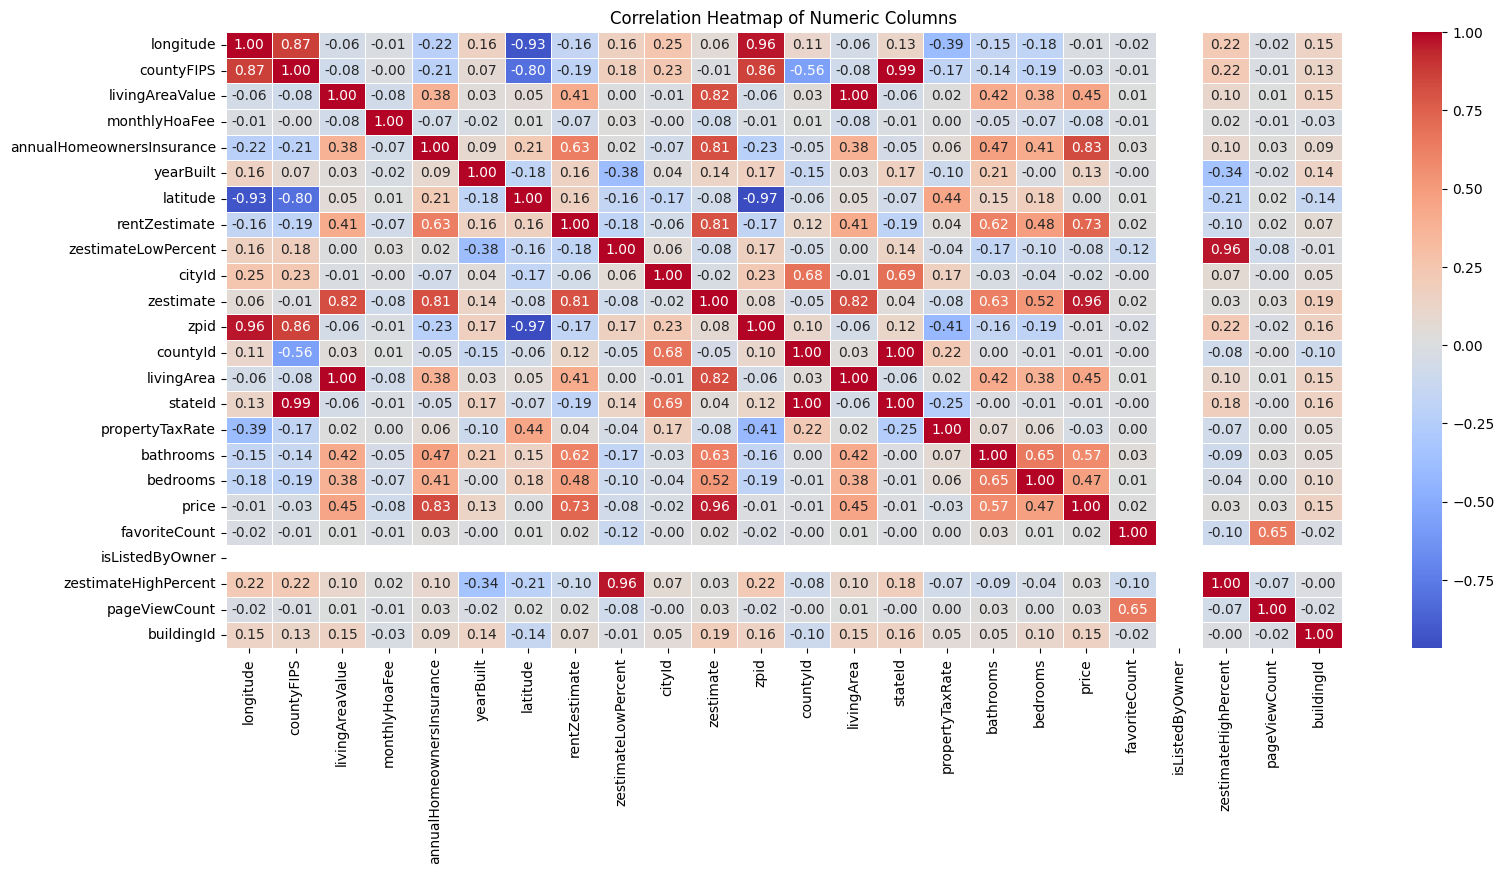

In [31]:
num_col = df.select_dtypes(include='number')
corr_matrix = num_col.corr()

plt.figure(figsize = (18, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title("Correlation Heatmap of Numeric Columns")
plt.show()

In [32]:
df.columns

Index(['contact_recipients', 'longitude', 'countyFIPS', 'imgSrc',
       'livingAreaValue', 'streetAddress', 'county', 'monthlyHoaFee',
       'timeZone', 'taxHistory', 'dateSold', 'annualHomeownersInsurance',
       'state', 'listed_by', 'yearBuilt', 'brokerageName', 'description',
       'latitude', 'nearbyHomes', 'priceHistory', 'schools', 'rentZestimate',
       'city', 'providerListingID', 'currency', 'listingProvider',
       'zestimateLowPercent', 'openHouseSchedule', 'mortgageRates', 'address',
       'cityId', 'timeOnZillow', 'url', 'zestimate', 'zpid', 'countyId',
       'livingAreaUnits', 'livingArea', 'building', 'stateId', 'zipcode',
       'propertyTaxRate', 'attributionInfo', 'bathrooms', 'homeStatus',
       'resoFacts', 'datePosted', 'bedrooms', 'propertyTypeDimension',
       'mortgageZHLRates', 'price', 'favoriteCount', 'isListedByOwner',
       'zestimateHighPercent', 'mlsid', 'listingSubType', 'pageViewCount',
       'buildingId', 'country', 'homeType'],
      dtyp

In [33]:
df['taxHistory']

0                                                      {}
1                                                      {}
2                                                      {}
3                                                      {}
4                                                      {}
                              ...                        
6038    [{'time': 1692051214290, 'valueIncreaseRate': ...
6039    [{'time': 1692051220320, 'valueIncreaseRate': ...
6040    [{'time': 1692051226239, 'valueIncreaseRate': ...
6041    [{'time': 1692051251284, 'valueIncreaseRate': ...
6042    [{'time': 1692051272666, 'valueIncreaseRate': ...
Name: taxHistory, Length: 6043, dtype: object

In [34]:
df_x = df.drop(['contact_recipients', 'countyFIPS', 'imgSrc',
      'streetAddress', 'county',
       'taxHistory', 'dateSold', 'annualHomeownersInsurance',
      'listed_by', 'brokerageName', 
       'schools', 'providerListingID', 'listingProvider',
       'zestimateLowPercent', 'openHouseSchedule', 'address',
       'cityId', 'url', 'zpid', 'countyId',
       'stateId', 'zipcode',
       'propertyTaxRate', 
       'bedrooms', 'propertyTypeDimension',
       'mortgageZHLRates', 'isListedByOwner',
       'zestimateHighPercent', 'mlsid', 
       'buildingId'], axis=1)

In [35]:
df_x.isna().sum()

longitude             1
livingAreaValue     174
monthlyHoaFee      4882
timeZone              0
state                 0
yearBuilt           353
description          12
latitude              1
nearbyHomes           0
priceHistory          1
rentZestimate         9
city                  0
currency              0
mortgageRates       839
timeOnZillow        449
zestimate           368
livingAreaUnits     174
livingArea          174
building           6032
attributionInfo       0
bathrooms           126
homeStatus            0
resoFacts             0
datePosted         5331
price                 0
favoriteCount         0
listingSubType        0
pageViewCount         0
country               0
homeType              0
dtype: int64

In [36]:
df_x['listingSubType']

0       {'is_FSBA': False, 'is_comingSoon': False, 'is...
1       {'is_FSBA': False, 'is_comingSoon': False, 'is...
2       {'is_FSBA': False, 'is_comingSoon': False, 'is...
3       {'is_FSBA': False, 'is_comingSoon': False, 'is...
4       {'is_FSBA': False, 'is_comingSoon': False, 'is...
                              ...                        
6038    {'is_FSBA': False, 'is_comingSoon': False, 'is...
6039    {'is_FSBA': False, 'is_comingSoon': False, 'is...
6040    {'is_FSBA': False, 'is_comingSoon': False, 'is...
6041    {'is_FSBA': False, 'is_comingSoon': False, 'is...
6042    {'is_FSBA': False, 'is_comingSoon': False, 'is...
Name: listingSubType, Length: 6043, dtype: object

In [37]:
df_x = df_x.drop(['nearbyHomes', 'priceHistory', 'mortgageRates', 'attributionInfo', 'resoFacts','listingSubType'], axis=1)

After dropping some columns and imputing the price column, a heatmap is constructed in order to see what kind of correlation there is between columns. 

In [38]:
df_x.columns

Index(['longitude', 'livingAreaValue', 'monthlyHoaFee', 'timeZone', 'state',
       'yearBuilt', 'description', 'latitude', 'rentZestimate', 'city',
       'currency', 'timeOnZillow', 'zestimate', 'livingAreaUnits',
       'livingArea', 'building', 'bathrooms', 'homeStatus', 'datePosted',
       'price', 'favoriteCount', 'pageViewCount', 'country', 'homeType'],
      dtype='object')

In [39]:
df['timeOnZillow'] =df['timeOnZillow'].apply(
    lambda x: int(re.search(r'\d+', x).group()) if isinstance(x, str) else x
)

In [40]:
exclude_cols = ['description']

numeric_cols = [col for col in df_x.select_dtypes(include='number').columns if col not in exclude_cols]
categorical_cols = [col for col in df_x.select_dtypes(exclude='number').columns if col not in exclude_cols]

knn_imputer = KNNImputer(n_neighbors=2)
df_numeric = pd.DataFrame(knn_imputer.fit_transform(df_x[numeric_cols]), columns=numeric_cols)
df_numeric = df_numeric.round().astype(int)

cat_imputer = SimpleImputer(strategy='most_frequent')
df_categorical = pd.DataFrame(cat_imputer.fit_transform(df_x[categorical_cols]), columns=categorical_cols)

df_categorical_encoded = pd.get_dummies(df_categorical, drop_first=False).astype(int)

df_final = pd.concat([
    df_numeric.reset_index(drop=True),
    df_categorical_encoded.reset_index(drop=True),
    df[exclude_cols].reset_index(drop=True)  
], axis=1)

In [41]:
df_final

,longitude,livingAreaValue,monthlyHoaFee,yearBuilt,latitude,rentZestimate,zestimate,livingArea,bathrooms,price,...,country_USA,homeType_APARTMENT,homeType_CONDO,homeType_HOME_TYPE_UNKNOWN,homeType_LOT,homeType_MANUFACTURED,homeType_MULTI_FAMILY,homeType_SINGLE_FAMILY,homeType_TOWNHOUSE,description
0,-106,300,130,1998,41,693,100350,300,1,357900,...,1,1,0,0,0,0,0,0,0,This 300 square foot apartment home has 0 bedr...
1,-78,1200,26,1965,39,1711,575900,1200,6,575900,...,1,0,0,0,0,0,1,0,0,This 1200 square foot multi family home has 9 ...
2,-80,750,482,1957,40,1110,154600,750,2,950,...,1,1,0,0,0,0,0,0,0,"This is a 3 bedroom, 1.5 bath apartment in a 3..."
3,-80,1464,134,2001,38,1542,372600,1464,3,372600,...,1,0,0,0,0,0,0,1,0,Great location! Secluded as it sits at the end...
4,-82,680,164,1998,38,845,130450,680,1,357900,...,1,1,0,0,0,0,0,0,0,Available for Move In September 18th!\n\nSpaci...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6038,-150,4263,28,1978,61,3903,658100,4263,2,658100,...,1,0,0,0,0,0,0,1,0,An entertainer's dream! The open floor plan wr...
6039,-150,2200,28,1974,61,3562,514200,2200,2,514200,...,1,0,0,0,0,0,0,1,0,This 2200 square foot single family home has 4...
6040,-150,4180,45,1972,61,4917,659000,4180,4,659000,...,1,0,0,0,0,0,0,1,0,This 4180 square foot single family home has 5...
6041,-150,3928,45,1972,61,4130,709400,3928,3,709400,...,1,0,0,0,0,0,0,1,0,"Tastefully remodeled, not a trace of an older ..."


In [42]:
df_ml = df_final.drop(['description', 'price'], axis=1)

In [43]:
X = df_ml
y = df_final['price'] 

model = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Linear Regression

In [44]:
model.fit(X_train, y_train)

print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {model.coef_}")

y_pred = model.predict(X_test)

Intercept: 179837.0217488704
Coefficients: [ 5.44177659e+04  8.12017353e-03 -6.13463789e+00 ... -1.46085583e+03
  7.77671191e+02  7.07294388e+03]


In [45]:
y_pred

array([266802.63568228, 116913.40649309, 442393.27143842, ...,
       314513.77613266, 521187.69158362, 214470.93585631], shape=(1209,))

In [46]:
# R-squared value
r_squared_lr = model.score(X_test, y_test)
print(f"R-squared: {r_squared_lr}")

# Mean Squared Error (MSE)
mse_lr = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse_lr}")

# Mean Squared Error (RMSE)
rmse_lr = np.sqrt(mse_lr)
print(f"Root Mean Squared Error: {rmse_lr}")

# Mean Absolute Error (MAE)
mae_lr = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae_lr}")

R-squared: 0.09522444109877648
Mean Squared Error: 27255894612.103252
Root Mean Squared Error: 165093.59349200455
Mean Absolute Error: 31246.588584567504


XGBoost

In [47]:
# # df['nearbyHomes'][0]

# Splitting 
train_X, test_X, train_y, test_y = train_test_split(X, y, 
                      test_size = 0.3, random_state = 123) 
  
# Instantiation 
xgb_r = xg.XGBRegressor(objective ='reg:linear', 
                  n_estimators = 10, seed = 123) 
  
# Fitting the model 
xgb_r.fit(train_X, train_y) 
  
# Predict the model 
pred = xgb_r.predict(test_X) 
  
# R-squared value
r_squared_xgb = r2_score(test_y, pred)
print(f"R-squared: {r_squared_xgb}")

# Mean Squared Error (MSE)
mse_xgb = mean_squared_error(test_y, pred)
print(f"Mean Squared Error: {mse_xgb}")

# RMSE Computation 
rmse_xgb = np.sqrt(mse_xgb) 
print(f"RMSE: {rmse_xgb}") 

# Mean Absolute Error (MAE)
mae_xgb = mean_absolute_error(test_y, pred)
print(f"Mean Absolute Error: {mae_xgb}")

c:\Users\roedayrajsinghvarma\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning:

[22:44:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\objective\regression_obj.cu:250: reg:linear is now deprecated in favor of reg:squarederror.



R-squared: 0.9545215368270874
Mean Squared Error: 1322608000.0
RMSE: 36367.6779572191
Mean Absolute Error: 10710.9853515625


Random Forrest Regression

In [48]:
rf = RandomForestRegressor(n_estimators = 300, max_features = 'sqrt', max_depth = 20, random_state = 18)
train_X, test_X, train_y, test_y = train_test_split(X, y, 
                      test_size = 0.3, random_state = 123) 
  
model_rf = rf.fit(train_X, train_y)

prediction = rf.predict(test_X)

# R-squared value
r_squared_rf = r2_score(test_y, prediction)
print(f"R-squared: {r_squared_rf}")

# Mean Squared Error (MSE)
mse_rf = mean_squared_error(test_y, prediction)
print(f"Mean Squared Error: {mse_rf}")

# RMSE Computation 
rmse_rf = np.sqrt(mse_rf) 
print(f"RMSE: {rmse_rf}") 

# Mean Absolute Error (MAE)
mae_rf = mean_absolute_error(test_y, pred)
print(f"Mean Absolute Error: {mae_rf}")

R-squared: 0.6918296311453225
Mean Squared Error: 8962238395.710958
RMSE: 94669.09947660302
Mean Absolute Error: 10710.9853515625


Gradient Boost

In [49]:
train_X, test_X, train_y, test_y = train_test_split(X, y, 
                                                    test_size = 0.25, 
                                                    random_state = 23)

gbr = GradientBoostingRegressor(loss='absolute_error',
                                learning_rate=0.1,
                                n_estimators=300,
                                max_depth = 20, 
                                random_state = 23,
                                max_features = 5)

gbr.fit(train_X, train_y)

pred_y = gbr.predict(test_X)

# R-squared value
r_squared_gb = r2_score(test_y, pred_y)
print(f"R-squared: {r_squared_gb}")

# Mean Squared Error (MSE)
mse_gb = mean_squared_error(test_y, pred_y)
print(f"Mean Squared Error: {mse_gb}")

# RMSE Computation 
rmse_gb = np.sqrt(mse_gb) 
print(f"RMSE: {rmse_gb}") 

# Mean Absolute Error (MAE)
mae_gb = mean_absolute_error(test_y, pred_y)
print(f"Mean Absolute Error: {mae_gb}")

R-squared: 0.6219106658461061
Mean Squared Error: 11082117438.352898
RMSE: 105271.63643808762
Mean Absolute Error: 54305.34268765005


Multi-layered perceptron NN

In [50]:
# model = MLPRegressor(hidden_layer_sizes=(512, 1024, 2048, 1024, 512, 256), activation='relu', solver='adam', max_iter=200, batch_size=512, verbose=True)
# model.fit(train_X, train_y)
# predictions = model.predict(test_X)

# # R-squared value
# r_squared_NN = r2_score(test_y, predictions)
# print(f"R-squared: {r_squared_NN}")

# # Mean Squared Error (MSE)
# mse_NN = mean_squared_error(test_y, predictions)
# print(f"Mean Squared Error: {mse_NN}")

# # RMSE Computation 
# rmse_NN = np.sqrt(mse_NN) 
# print(f"RMSE: {rmse_NN}") 

# # Mean Absolute Error (MAE)
# mae_NN = mean_absolute_error(test_y, predictions)
# print(f"Mean Absolute Error: {mae_NN}")

DoRA model

In [51]:
import torch
import torch.nn as nn
import numpy as np

class DNN(nn.Module):
    def __init__(self, in_feats, act=nn.Mish, pretrained_model=None):
        super().__init__()
        self.pretrained_model = pretrained_model
        self.embedding_layer = nn.Sequential(
            nn.Linear(in_feats, 128)
        )
        self.encoder = nn.Sequential(
            nn.Linear(128, 64),
            nn.Dropout(p=0),
            act(),
            nn.Linear(64, 32),
            nn.Dropout(p=0),
            act(),
            nn.Linear(32, 128)
        )
        self.predictor = nn.Sequential(
            nn.Linear(128, 32),
            nn.Dropout(p=0),
            act(),   
            nn.Linear(32, 1),
        )

    def forward(self, cat_feat, num_feat=None):
        if self.pretrained_model is not None:
            pretrained_embed = self.pretrained_model(cat_feat, num_feat, get_embedding=True)
            embedding = self.embedding_layer(pretrained_embed)
            encoder_output = self.encoder(embedding)
            pred = self.predictor(encoder_output)
            return pred, embedding
        else:
            embedding = self.embedding_layer(cat_feat)
            pred = self.predictor(embedding)
            return pred, embedding
        

class Encoder(nn.Module):
    def __init__(self, categorical, numerical, out_dim, act=nn.Mish):
        super().__init__()
        categorical_dim = 10
        for i in range(len(categorical)):
            setattr(self, f'embed{i}', nn.Embedding(categorical[i], categorical_dim))


        self.num_embed = nn.Sequential(
            nn.Linear(numerical, 64),
            nn.Dropout(p=0.1),
            act(),
            nn.Linear(64, 32)
        )

        self.encoder = nn.Sequential(
            nn.Linear(len(categorical)*categorical_dim+32, 256),
            nn.Dropout(p=0.1),
            act(),
            nn.Linear(256, 512),
            nn.Dropout(p=0.1),
            act(),            
            nn.Linear(512, 1024),
            nn.Dropout(p=0.1),
            act(),
            nn.Linear(1024, 512),
            nn.Dropout(p=0.1),
            act(),
            nn.Linear(512, 128)
        )
        self.pretrained_layer = nn.Sequential(
            nn.Linear(256, out_dim)
        )

def forward(self, categorical, numerical, get_embedding=False):
    # List to store embedding outputs
    outputs = []

    # Loop through the number of columns in categorical input
    for i in range(categorical.shape[1]):  # Using shape[1] for number of columns
        # Dynamically get the embedding method and call it
        embed_method = getattr(self, f'embed{i}', None)
        if embed_method is not None:
            output = embed_method(categorical[:, i])  # Call the embedding method
            outputs.append(output)  # Store the output

    # If the number of columns is 17, handle that case specifically
    if categorical.shape[1] == 17:
        embed_method = getattr(self, 'embed16', None)
        if embed_method is not None:
            output = embed_method(categorical[:, 16])
            outputs.append(output)

    # Concatenate all outputs along the second dimension (dim=1)
    total = torch.cat(outputs, dim=1)  # Concatenate all outputs at once

    # Process numerical inputs
    imp_num = self.num_embed(numerical)
    total = torch.cat((total, imp_num), dim=1)  # Concatenate numerical embeddings

    # Final processing based on get_embedding flag
    if get_embedding:
        return self.encoder(total)  # Return only the encoded output
    else:
        embedding = self.encoder(total)  # Get the embedding
        output = self.pretrained_layer(embedding)  # Process with pretrained layer
        return output, embedding  # Return both output and embedding




In [52]:
#df_categorical.isna().sum()

In [53]:
numeric_features = []
for i in df_numeric.columns:
    numeric_features.append(i)

numeric_features.remove('price')

In [54]:
numeric_features

['longitude',
 'livingAreaValue',
 'monthlyHoaFee',
 'yearBuilt',
 'latitude',
 'rentZestimate',
 'zestimate',
 'livingArea',
 'bathrooms',
 'favoriteCount',
 'pageViewCount']

In [55]:
cat_features = []
for j in df_categorical.columns:
    cat_features.append(j)
print (len(cat_features))

11


In [56]:
combined_df = pd.concat([df_categorical, df_numeric], axis=1)
target = combined_df['price']
features = combined_df.drop(columns=['price'])

In [61]:
label_encoders = {}
target_column = 'price'

for col in cat_features:
    labenc = LabelEncoder()
    combined_df[col] = labenc.fit_transform(combined_df[col])
    label_encoders[col] = labenc


In [62]:
X = combined_df[cat_features+numeric_features]
y = combined_df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [63]:
categorical = [df[cat_col].nunique() for cat_col in cat_features]
numerical = len(numeric_features)
out_dim = 1

# encoder = Encoder(categorical=categorical, numerical=numerical,out_dim=out_dim)
# dnn_model = DNN(in_feats=256, act = nn.Mish, pretrained_model=encoder)

In [89]:
class DNN(nn.Module):
    def __init__(self, in_feats, act=nn.Mish, pretrained_model=None):
        super().__init__()
        self.pretrained_model = pretrained_model
        self.embedding_layer = nn.Sequential(
            nn.Linear(in_feats, 128)
        )
        self.encoder = nn.Sequential(
            nn.Linear(128, 64),
            nn.Dropout(p=0),
            act(),
            nn.Linear(64, 32),
            nn.Dropout(p=0),
            act(),
            nn.Linear(32, 128)
        )
        self.predictor = nn.Sequential(
            nn.Linear(128, 32),
            nn.Dropout(p=0),
            act(),   
            nn.Linear(32, 1),
        )

    def forward(self, cat_feat, num_feat=None):
        if self.pretrained_model is not None:
            pretrained_embed = self.pretrained_model(cat_feat, num_feat, get_embedding=True)
            embedding = self.embedding_layer(pretrained_embed)
            encoder_output = self.encoder(embedding)
            pred = self.predictor(encoder_output)
            return pred, embedding
        else:
            embedding = self.embedding_layer(cat_feat)
            pred = self.predictor(embedding)
            return pred, embedding
        

class Encoder(nn.Module):
    def __init__(self, categorical, numerical, out_dim, act=nn.Mish):
        super().__init__()
        categorical_dim = 10
        self.embed0 = nn.Embedding(categorical[0], categorical_dim)
        self.embed1 = nn.Embedding(categorical[1], categorical_dim)
        self.embed2 = nn.Embedding(categorical[2], categorical_dim)
        self.embed3 = nn.Embedding(categorical[3], categorical_dim)
        self.embed4 = nn.Embedding(categorical[4], categorical_dim)
        self.embed5 = nn.Embedding(categorical[5], categorical_dim)
        self.embed6 = nn.Embedding(categorical[6], categorical_dim)
        self.embed7 = nn.Embedding(categorical[7], categorical_dim)
        self.embed8 = nn.Embedding(categorical[8], categorical_dim)
        self.embed9 = nn.Embedding(categorical[9], categorical_dim)
        self.embed10 = nn.Embedding(categorical[10], categorical_dim)
        self.embed11 = nn.Embedding(categorical[11], categorical_dim)
        # self.embed12 = nn.Embedding(categorical[12], categorical_dim)
        # self.embed13 = nn.Embedding(categorical[13], categorical_dim)
        # self.embed14 = nn.Embedding(categorical[14], categorical_dim)
        # self.embed15 = nn.Embedding(categorical[15], categorical_dim)
        # if len(categorical) == 17:
        #     self.embed16 = nn.Embedding(categorical[16], categorical_dim)

        self.num_embed = nn.Sequential(
            nn.Linear(numerical, 64),
            nn.Dropout(p=0.1),
            act(),
            nn.Linear(64, 32)
        )

        self.encoder = nn.Sequential(
            nn.Linear(len(categorical)*categorical_dim+32, 256),
            nn.Dropout(p=0.1),
            act(),
            nn.Linear(256, 512),
            nn.Dropout(p=0.1),
            act(),            
            nn.Linear(512, 1024),
            nn.Dropout(p=0.1),
            act(),
            nn.Linear(1024, 512),
            nn.Dropout(p=0.1),
            act(),
            nn.Linear(512, 256)
        )
        self.pretrained_layer = nn.Sequential(
            nn.Linear(256, out_dim)
        )

    def forward(self, categorical, numerical, get_embedding = False):
        output0 = self.embed0(categorical[:, 0])
        output1 = self.embed1(categorical[:, 1])
        output2 = self.embed2(categorical[:, 2])
        output3 = self.embed3(categorical[:, 3])
        output4 = self.embed4(categorical[:, 4])
        output5 = self.embed5(categorical[:, 5])
        output6 = self.embed6(categorical[:, 6])
        output7 = self.embed7(categorical[:, 7])
        output8 = self.embed8(categorical[:, 8])
        output9 = self.embed9(categorical[:, 9])
        output10 = self.embed10(categorical[:, 10])
        output11 = self.embed11(categorical[:, 11])
        output12 = self.embed12(categorical[:, 12])
        output13 = self.embed13(categorical[:, 13])
        output14 = self.embed14(categorical[:, 14])
        output15 = self.embed15(categorical[:, 15])
        if len(categorical[0]) == 17:
            output16 = self.embed16(categorical[:, 16])

        total = output0
        total = torch.cat((total, output1), 1)
        total = torch.cat((total, output2), 1)
        total = torch.cat((total, output3), 1)
        total = torch.cat((total, output4), 1)
        total = torch.cat((total, output5), 1)
        total = torch.cat((total, output6), 1)
        total = torch.cat((total, output7), 1)
        total = torch.cat((total, output8), 1)
        total = torch.cat((total, output9), 1)
        total = torch.cat((total, output10), 1)
        total = torch.cat((total, output11), 1)
        total = torch.cat((total, output12), 1)
        total = torch.cat((total, output13), 1)
        total = torch.cat((total, output14), 1)
        total = torch.cat((total, output15), 1)
        if len(categorical[0]) == 17:
            total = torch.cat((total, output16), 1)
        
        imp_num = self.num_embed(numerical)
        total = torch.cat((total, imp_num), 1)

        if get_embedding:
            return self.encoder(total)
        else:
            embedding = self.encoder(total)
            output = self.pretrained_layer(embedding)
            return output, embedding


In [68]:
df_final

,longitude,livingAreaValue,monthlyHoaFee,yearBuilt,latitude,rentZestimate,zestimate,livingArea,bathrooms,price,...,country_USA,homeType_APARTMENT,homeType_CONDO,homeType_HOME_TYPE_UNKNOWN,homeType_LOT,homeType_MANUFACTURED,homeType_MULTI_FAMILY,homeType_SINGLE_FAMILY,homeType_TOWNHOUSE,description
0,-106,300,130,1998,41,693,100350,300,1,357900,...,1,1,0,0,0,0,0,0,0,This 300 square foot apartment home has 0 bedr...
1,-78,1200,26,1965,39,1711,575900,1200,6,575900,...,1,0,0,0,0,0,1,0,0,This 1200 square foot multi family home has 9 ...
2,-80,750,482,1957,40,1110,154600,750,2,950,...,1,1,0,0,0,0,0,0,0,"This is a 3 bedroom, 1.5 bath apartment in a 3..."
3,-80,1464,134,2001,38,1542,372600,1464,3,372600,...,1,0,0,0,0,0,0,1,0,Great location! Secluded as it sits at the end...
4,-82,680,164,1998,38,845,130450,680,1,357900,...,1,1,0,0,0,0,0,0,0,Available for Move In September 18th!\n\nSpaci...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6038,-150,4263,28,1978,61,3903,658100,4263,2,658100,...,1,0,0,0,0,0,0,1,0,An entertainer's dream! The open floor plan wr...
6039,-150,2200,28,1974,61,3562,514200,2200,2,514200,...,1,0,0,0,0,0,0,1,0,This 2200 square foot single family home has 4...
6040,-150,4180,45,1972,61,4917,659000,4180,4,659000,...,1,0,0,0,0,0,0,1,0,This 4180 square foot single family home has 5...
6041,-150,3928,45,1972,61,4130,709400,3928,3,709400,...,1,0,0,0,0,0,0,1,0,"Tastefully remodeled, not a trace of an older ..."


In [69]:
df_final_DORA = df_final.drop(columns=['description'])

In [70]:
horizontal_concat = pd.concat([df_numeric, df_categorical], axis=1)

In [92]:
horizontal_concat

,longitude,livingAreaValue,monthlyHoaFee,yearBuilt,latitude,rentZestimate,zestimate,livingArea,bathrooms,price,...,state,city,currency,timeOnZillow,livingAreaUnits,building,homeStatus,datePosted,country,homeType
0,-106,300,130,1998,41,693,100350,300,1,357900,...,49,141,1,1169,0,0,3,159,1,0
1,-78,1200,26,1965,39,1711,575900,1200,6,575900,...,48,160,1,1169,0,0,3,159,1,5
2,-80,750,482,1957,40,1110,154600,750,2,950,...,48,174,1,2880,0,1,1,427,1,0
3,-80,1464,134,2001,38,1542,372600,1464,3,372600,...,48,254,1,1169,0,0,3,159,1,6
4,-82,680,164,1998,38,845,130450,680,1,357900,...,48,24,1,1169,0,0,3,159,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6038,-150,4263,28,1978,61,3903,658100,4263,2,658100,...,0,12,1,419,0,0,3,159,1,6
6039,-150,2200,28,1974,61,3562,514200,2200,2,514200,...,0,12,1,1434,0,0,3,159,1,6
6040,-150,4180,45,1972,61,4917,659000,4180,4,659000,...,0,12,1,959,0,0,3,159,1,6
6041,-150,3928,45,1972,61,4130,709400,3928,3,709400,...,0,12,1,1281,0,0,3,159,1,6


In [71]:
cat_list = []
for i in df_categorical.columns:
    cat_list.append(i)

In [72]:
num_list = []
for i in df_numeric.columns:
    num_list.append(i)
num_list.remove('price')

In [86]:
cat_dims = [df[feature].nunique() for feature in cat_list]
num_numerical = len(num_list)

In [87]:
target = 'price'

In [ ]:
for col in cat_list:
    #le = LabelEncoder()
    #horizontal_concat[col] = le.fit_transform(horizontal_concat[col])
    encoder_data = Encoder(categorical=cat_dims, numerical=num_numerical, out_dim=256)
    # horizontal_concat[col] = encoder_data.encoder(horizontal_concat[col])

    #Code works if using LabelEncoder

NameError: name 'cat_list' is not defined

In [77]:
X = horizontal_concat[cat_list+num_list]
y = horizontal_concat['price']

In [78]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [79]:
train_features = torch.tensor(X_train.values, dtype=torch.float32)
train_labels = torch.tensor(y_train.values, dtype=torch.float32)
val_features = torch.tensor(X_val.values, dtype=torch.float32)
val_labels = torch.tensor(y_val.values, dtype=torch.float32)
test_features = torch.tensor(X_test.values, dtype=torch.float32)
test_labels = torch.tensor(y_test.values, dtype=torch.float32)

In [80]:
model = DNN(in_feats=len(X_train.columns))  
criterion = nn.MSELoss()  
optimizer = torch.optim.Adam(model.parameters(), lr=0.005)

In [81]:
from torch.utils.data import DataLoader, TensorDataset

train_dataset = TensorDataset(train_features, train_labels)
val_dataset = TensorDataset(val_features, val_labels)
test_dataset = TensorDataset(test_features, test_labels)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)

In [82]:
model.train()
num_epochs = 100 
total_loss = 0.0

for epoch in range(num_epochs):   
    for batch_features, batch_labels in train_loader:
        optimizer.zero_grad()
        
        predictions, _ = model(batch_features)  
        loss = criterion(predictions.squeeze(), batch_labels)  
        
        loss.backward()
        
        optimizer.step()
        
        total_loss += loss.item()
        
        avg_train_loss = total_loss / len(train_loader)
        print(f'Epoch [{epoch + 1}/{num_epochs}], Training Loss: {avg_train_loss:.4f}')
        
        model.eval() 
        val_loss = 0.0
        with torch.no_grad(): 
            for val_features, val_labels in val_loader:
                val_predictions, _ = model(val_features)
                loss = criterion(val_predictions.squeeze(), val_labels)
                val_loss += loss.item()
    
    avg_val_loss = val_loss / len(val_loader)
    print(f'Epoch [{epoch + 1}/{num_epochs}], Validation Loss: {avg_val_loss:.4f}')

Epoch [1/100], Training Loss: 3509042955.4627
Epoch [1/100], Training Loss: 5373600110.8060
Epoch [1/100], Training Loss: 6637113649.6716
Epoch [1/100], Training Loss: 7429627476.0597
Epoch [1/100], Training Loss: 8139538370.8657
Epoch [1/100], Training Loss: 8446685887.0448
Epoch [1/100], Training Loss: 8639575315.1045
Epoch [1/100], Training Loss: 8679989584.2388
Epoch [1/100], Training Loss: 8727697545.5522
Epoch [1/100], Training Loss: 8931400520.5970
Epoch [1/100], Training Loss: 9226611528.5970
Epoch [1/100], Training Loss: 9638950193.6716
Epoch [1/100], Training Loss: 10178058438.6866
Epoch [1/100], Training Loss: 10568605313.9104
Epoch [1/100], Training Loss: 10796322005.9701
Epoch [1/100], Training Loss: 10970597788.6567
Epoch [1/100], Training Loss: 11021161074.6269
Epoch [1/100], Training Loss: 11058558288.2388
Epoch [1/100], Training Loss: 11279168557.8507
Epoch [1/100], Training Loss: 11354740308.0597
Epoch [1/100], Training Loss: 11470147797.9701
Epoch [1/100], Training L